In [7]:
#X[X$Variable1!=11 & X$Variable1!=12, ]

#Read in Data
copy = read.csv('Results1/copy.csv')
colnames(copy) <- c("repl", "opt", "bits", "prec", "bw", "time")
copy = subset(copy, copy[ , 2] > 0) 

#Make factors categorical
copy$opt = factor(copy$opt)
copy$bits = factor(copy$bits)
copy$prec = factor(copy$prec)

#generate linear model
m  = lm(bw ~ opt*bits*prec, data=copy)

#report model
summary(m)


Call:
lm(formula = bw ~ opt * bits * prec, data = copy)

Residuals:
    Min      1Q  Median      3Q     Max 
-480.20  -39.40   14.07   60.28  341.20 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6594.57      89.78  73.453  < 2e-16 ***
opt2               157.87     126.97   1.243  0.22574    
opt3               273.90     126.97   2.157  0.04121 *  
bits1             -714.37     126.97  -5.626  8.6e-06 ***
prec1             -172.97     126.97  -1.362  0.18575    
opt2:bits1        -110.97     179.56  -0.618  0.54240    
opt3:bits1         794.10     179.56   4.423  0.00018 ***
opt2:prec1          82.90     179.56   0.462  0.64846    
opt3:prec1         123.43     179.56   0.687  0.49840    
bits1:prec1        361.23     179.56   2.012  0.05560 .  
opt2:bits1:prec1   -40.97     253.93  -0.161  0.87319    
opt3:bits1:prec1  -446.07     253.93  -1.757  0.09173 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual sta

In [8]:
#find percentage variation due to each factor
#anova
anova(m)
anova_m1 <- anova(m)

#pct variation
sst = sum(anova(m)$Sum)
pct_var = anova(m)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff <- data.frame(matrix(pct_var, nrow=1, ncol=8))
colnames(ff) <- anova_m1$factor
attr(ff,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
(ff)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
opt,2,2565549,1282774,53.04923,1.553349e-09
bits,1,1349392,1349392,55.80421,1.038215e-07
prec,1,202.5878,202.5878,0.008378033,0.9278299
opt:bits,2,836925.9,418463,17.30557,2.22215e-05
opt:prec,2,40065.4,20032.7,0.8284538,0.4488313
bits:prec,1,89002.78,89002.78,3.680717,0.06701599
opt:bits:prec,2,91189.94,45594.97,1.885583,0.1735423
Residuals,24,580339.9,24180.83,NA,NA


[1] "Percentage Variation of residuals"


,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
1,0.462039,0.2430169,3.648477e-05,0.150725,0.007215523,0.01602883,0.01642273,0.1045155


In [9]:
#find confidence interval for factors
confint(aov(m))

,2.5 %,97.5 %
(Intercept),6409.272,6779.862
opt2,-104.1798,419.9131
opt3,11.85353,535.94647
bits1,-976.4131,-452.3202
prec1,-435.0131,89.0798
opt2:bits1,-481.5563,259.6230
opt3:bits1,423.5103,1164.6897
opt2:prec1,-287.6897,453.4897
opt3:prec1,-247.1563,494.0230
bits1:prec1,-9.356334,731.823001


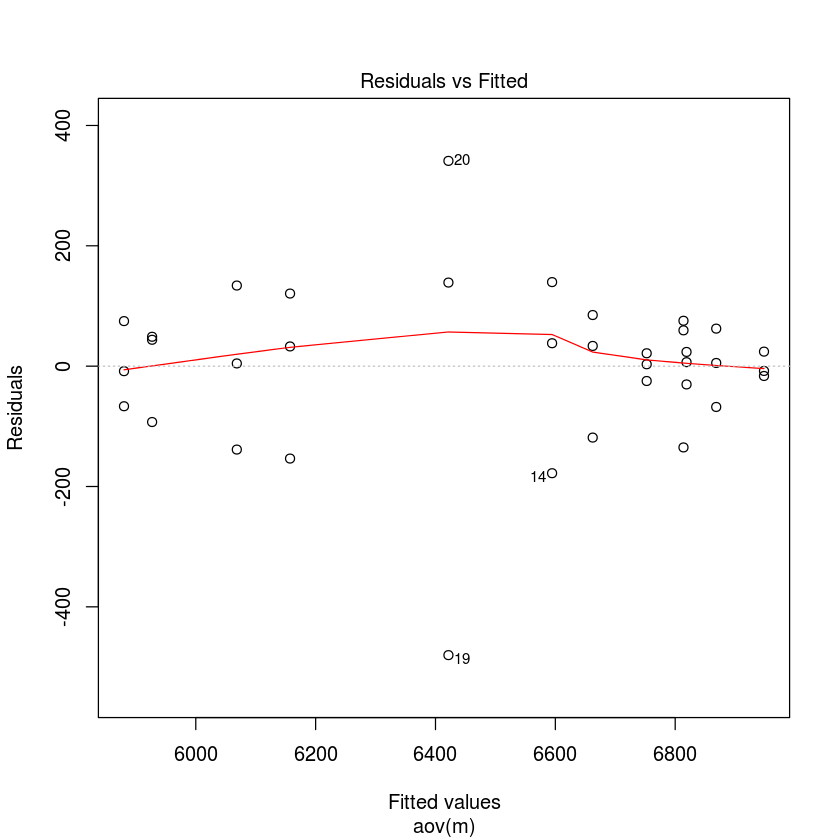

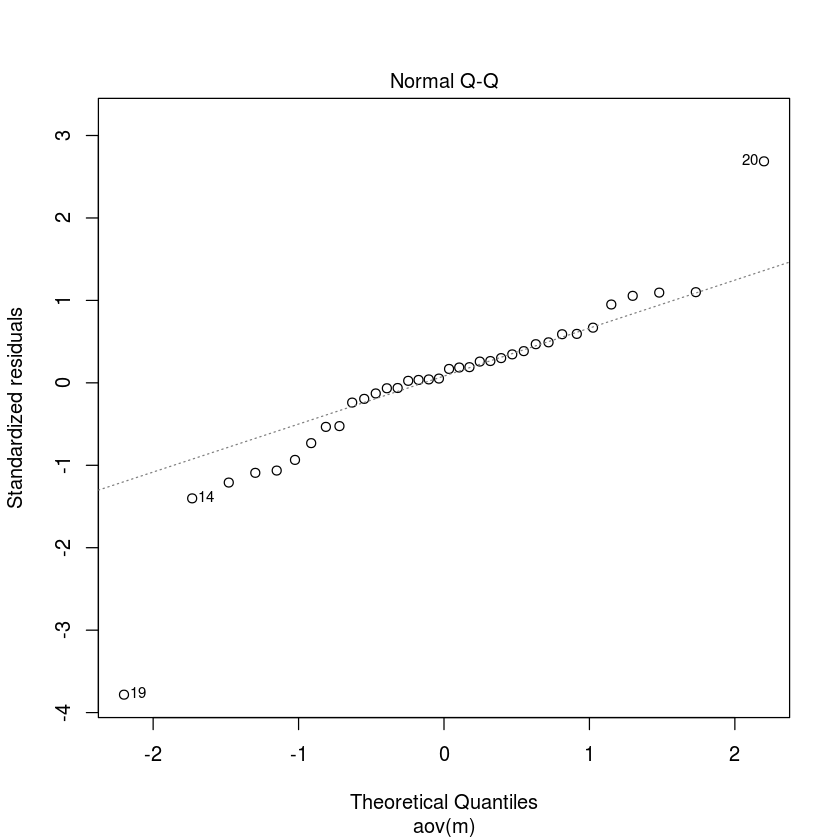

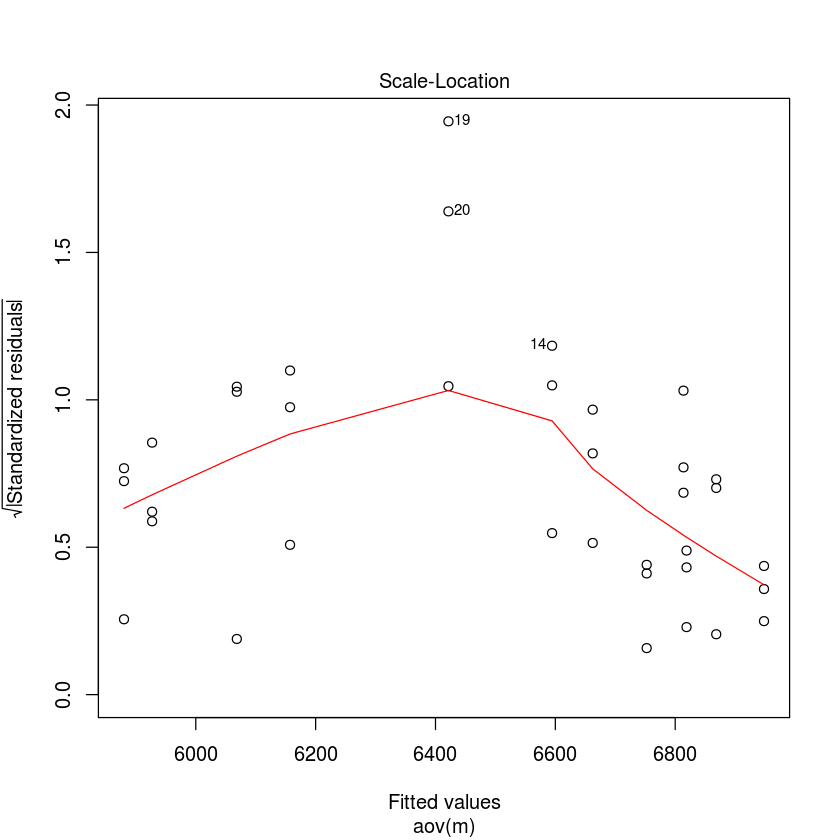

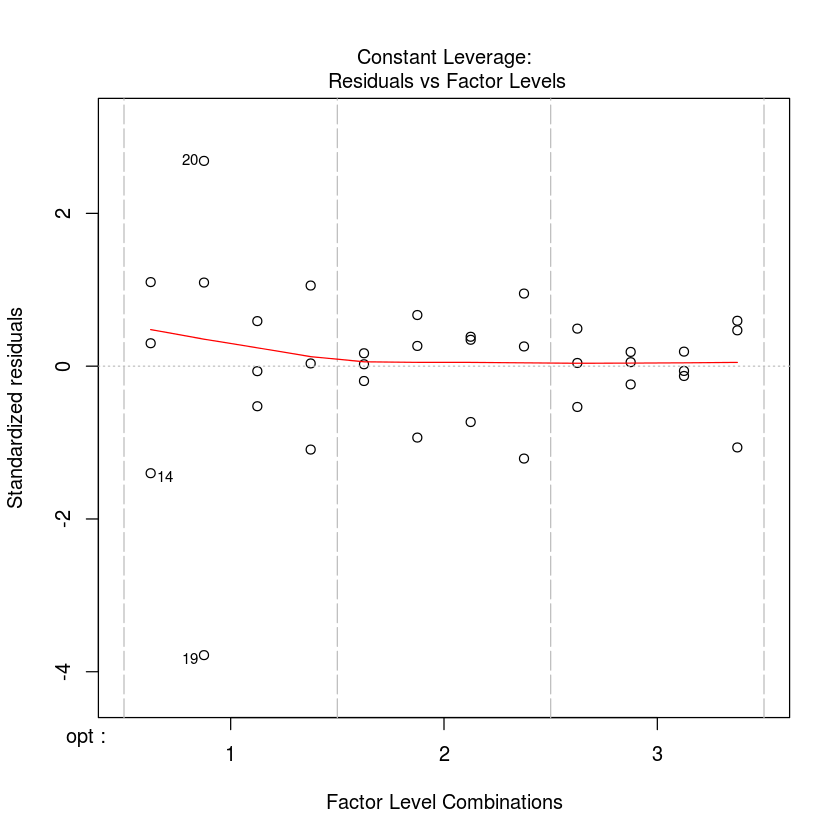

In [10]:
#plot anova stuff
plot(aov(m))

In [11]:
#Read in Data
scale = read.csv('Results1/scale.csv')
colnames(scale) <- c("repl", "opt", "bits", "prec", "bw", "time")
scale = subset(scale, scale[ , 2] > 0)

#Make factors categorical
scale$opt = factor(scale$opt)
scale$bits = factor(scale$bits)
scale$prec = factor(scale$prec)

#generate linear model
m2  = lm(bw ~ opt*bits*prec, data=scale)

#report model
summary(m2)

#find percentage variation due to each factor
#anova
anova(m2)
anova_m1 <- anova(m2)

#pct variation
sst = sum(anova(m2)$Sum)
pct_var = anova(m2)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff2 <- data.frame(matrix(pct_var, nrow=1, ncol=8))
colnames(ff2) <- anova_m1$factor
attr(ff2,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
(ff2)

#find confidence interval for factors
confint(aov(m2))


Call:
lm(formula = bw ~ opt * bits * prec, data = scale)

Residuals:
    Min      1Q  Median      3Q     Max 
-403.13  -33.26    6.52   31.39  271.27 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6565.83      67.70  96.985  < 2e-16 ***
opt2               106.80      95.74   1.116 0.275679    
opt3              -276.90      95.74  -2.892 0.008006 ** 
bits1             -480.17      95.74  -5.015 4.00e-05 ***
prec1             -884.20      95.74  -9.235 2.27e-09 ***
opt2:bits1         -57.20     135.40  -0.422 0.676453    
opt3:bits1          34.30     135.40   0.253 0.802174    
opt2:prec1         801.37     135.40   5.919 4.16e-06 ***
opt3:prec1        1404.33     135.40  10.372 2.40e-10 ***
bits1:prec1        752.70     135.40   5.559 1.02e-05 ***
opt2:bits1:prec1  -839.83     191.48  -4.386 0.000198 ***
opt3:bits1:prec1  -360.80     191.48  -1.884 0.071701 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual st

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
opt,2,813259,406629.5,29.57395,3.344407e-07
bits,1,873601.8,873601.8,63.53661,3.365435e-08
prec,1,6696.694,6696.694,0.4870471,0.4919542
opt:bits,2,358557.6,179278.8,13.03885,0.0001468256
opt:prec,2,2353295,1176648,85.57697,1.19676e-11
bits:prec,1,279558.9,279558.9,20.33218,0.0001447111
opt:bits:prec,2,266242.4,133121.2,9.681836,0.0008260802
Residuals,24,329990,13749.58,NA,NA


[1] "Percentage Variation of residuals"


,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
1,0.1539913,0.1654172,0.001268025,0.06789318,0.4455984,0.05293472,0.05041323,0.06248388


,2.5 %,97.5 %
(Intercept),6426.109,6705.558
opt2,-90.80024,304.40024
opt3,-474.50024,-79.29976
bits1,-677.7669,-282.5664
prec1,-1081.8002,-686.5998
opt2:bits1,-336.6489,222.2489
opt3:bits1,-245.1489,313.7489
opt2:prec1,521.9177,1080.8156
opt3:prec1,1124.884,1683.782
bits1:prec1,473.2511,1032.1489


In [12]:
#Read in Data
triad = read.csv('Results1/triad.csv')
colnames(triad) <- c("repl", "opt", "bits", "prec", "bw", "time")
triad = subset(triad, triad[ , 2] > 0)


#Make factors categorical
triad$opt = factor(triad$opt)
triad$bits = factor(triad$bits)
triad$prec = factor(triad$prec)

#generate linear model
m3  = lm(bw ~ opt*bits*prec, data=triad)

#report model
summary(m3)

#find percentage variation due to each factor
#anova
anova(m3)
anova_m1 <- anova(m3)

#pct variation
sst = sum(anova(m3)$Sum)
pct_var = anova(m3)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff3 <- data.frame(matrix(pct_var, nrow=1, ncol=8))
colnames(ff3) <- anova_m1$factor
attr(ff3,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
(ff3)

#find confidence interval for factors
confint(aov(m3))


Call:
lm(formula = bw ~ opt * bits * prec, data = triad)

Residuals:
    Min      1Q  Median      3Q     Max 
-553.77  -28.72    4.55   53.04  286.03 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6856.30     100.15  68.463  < 2e-16 ***
opt2                97.93     141.63   0.691  0.49590    
opt3                61.30     141.63   0.433  0.66901    
bits1             -245.90     141.63  -1.736  0.09535 .  
prec1             -184.43     141.63  -1.302  0.20520    
opt2:bits1         -60.63     200.29  -0.303  0.76471    
opt3:bits1          35.77     200.29   0.179  0.85977    
opt2:prec1          94.77     200.29   0.473  0.64039    
opt3:prec1         655.63     200.29   3.273  0.00321 ** 
bits1:prec1        -60.93     200.29  -0.304  0.76358    
opt2:bits1:prec1    15.60     283.26   0.055  0.95654    
opt3:bits1:prec1   285.47     283.26   1.008  0.32360    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual st

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
opt,2,1488753,744376.3,24.73997,1.474042e-06
bits,1,494818.5,494818.5,16.4457,0.0004581135
prec,1,65655.52,65655.52,2.182116,0.1526255
opt:bits,2,88168.72,44084.36,1.46518,0.250974
opt:prec,2,1132047,566023.4,18.81226,1.217565e-05
bits:prec,1,3496.751,3496.751,0.1162174,0.7361401
opt:bits:prec,2,38640.65,19320.32,0.6421271,0.5349746
Residuals,24,722112.2,30088.01,NA,NA


[1] "Percentage Variation of residuals"


,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
1,0.3690794,0.1226714,0.01627678,0.02185807,0.2806478,0.000866886,0.009579475,0.1790202


,2.5 %,97.5 %
(Intercept),6649.608,7062.992
opt2,-194.3738,390.2405
opt3,-231.0071,353.6071
bits1,-538.20715,46.40715
prec1,-476.7405,107.8738
opt2:bits1,-474.0181,352.7514
opt3:bits1,-377.6181,449.1514
opt2:prec1,-318.6181,508.1514
opt3:prec1,242.2486,1069.0181
bits1:prec1,-474.3181,352.4514


In [13]:
#Read in Data
add = read.csv('Results1/add.csv')
colnames(add) <- c("repl", "opt", "bits", "prec", "bw", "time")
add = subset(add, add[ , 2] > 0)


#Make factors categorical
add$opt = factor(add$opt)
add$bits = factor(add$bits)
add$prec = factor(add$prec)

#generate linear model
m4  = lm(bw ~ opt*bits*prec, data=add)

#report model
summary(m4)

#find percentage variation due to each factor
#anova
anova(m4)
anova_m1 <- anova(m4)

#pct variation
sst = sum(anova(m4)$Sum)
pct_var = anova(m4)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff4 <- data.frame(matrix(pct_var, nrow=1, ncol=8))
colnames(ff4) <- anova_m1$factor
attr(ff4,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
(ff4)

#find confidence interval for factors
confint(aov(m4))


Call:
lm(formula = bw ~ opt * bits * prec, data = add)

Residuals:
    Min      1Q  Median      3Q     Max 
-336.43  -39.85   -3.33   37.32  373.47 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       7232.07      70.81 102.132  < 2e-16 ***
opt2              -244.50     100.14  -2.442 0.022373 *  
opt3               161.30     100.14   1.611 0.120318    
bits1             -501.20     100.14  -5.005 4.11e-05 ***
prec1             -641.93     100.14  -6.410 1.25e-06 ***
opt2:bits1         235.33     141.62   1.662 0.109582    
opt3:bits1        -109.50     141.62  -0.773 0.446963    
opt2:prec1         563.97     141.62   3.982 0.000551 ***
opt3:prec1         688.30     141.62   4.860 5.93e-05 ***
bits1:prec1        589.87     141.62   4.165 0.000347 ***
opt2:bits1:prec1  -494.63     200.28  -2.470 0.021024 *  
opt3:bits1:prec1  -150.03     200.28  -0.749 0.461076    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual stan

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
opt,2,1269656,634827.9,42.20178,1.386795e-08
bits,1,664714.1,664714.1,44.18854,7.093132e-07
prec,1,12335.8,12335.8,0.8200535,0.3741663
opt:bits,2,63957.75,31978.88,2.125876,0.1412506
opt:prec,2,564375,282187.5,18.75912,1.243047e-05
bits:prec,1,316368.8,316368.8,21.03141,0.000119001
opt:bits:prec,2,96480.32,48240.16,3.206886,0.05830309
Residuals,24,361024.4,15042.68,NA,NA


[1] "Percentage Variation of residuals"


,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
1,0.3791249,0.1984866,0.003683526,0.01909807,0.1685249,0.09446912,0.02880945,0.1078035


,2.5 %,97.5 %
(Intercept),7085.920,7378.214
opt2,-451.18328,-37.81672
opt3,-45.38328,367.98328
bits1,-707.8833,-294.5167
prec1,-848.6166,-435.2501
opt2:bits1,-56.96097,527.62764
opt3:bits1,-401.7943,182.7943
opt2:prec1,271.6724,856.2610
opt3:prec1,396.0057,980.5943
bits1:prec1,297.5724,882.1610


In [14]:
#combine and summarize data

#variation due to factors
total <- rbind(ff, ff2, ff3, ff4)
avg <- c(mean(total$opt), mean(total$bits), mean(total$prec),
         mean(total$'opt:bits'), mean(total$'opt:prec'), mean(total$'bits:prec'),
         mean(total$'opt:bits:prec'), mean(total$Residuals))
total2 <- rbind(total, avg)
row.names(total2) <- c("copy", "scale", "triad", "add", "Average")
total2

,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
copy,0.462039,0.2430169,3.648477e-05,0.150725,0.007215523,0.01602883,0.01642273,0.1045155
scale,0.1539913,0.1654172,0.001268025,0.06789318,0.4455984,0.05293472,0.05041323,0.06248388
triad,0.3690794,0.1226714,0.01627678,0.02185807,0.2806478,0.000866886,0.009579475,0.1790202
add,0.3791249,0.1984866,0.003683526,0.01909807,0.1685249,0.09446912,0.02880945,0.1078035
Average,0.3410586,0.182398,0.005316204,0.06489359,0.2254967,0.04107489,0.02630622,0.1134558
